In [94]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!pip install docx2txt
!pip install chart_studio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [71]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [71]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [95]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import docx2txt
from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

import chart_studio.plotly as py

warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('ResumeDataSet.csv')
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [129]:
df.describe()

Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [131]:
df.shape

(962, 2)

In [132]:
df.dtypes

Category    object
Resume      object
dtype: object

In [133]:
df.nunique()

Category     25
Resume      166
dtype: int64

In [134]:
df[df.isna().any(axis=1) | df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Category, Resume]
Index: []

In [135]:
df['length'] = df['Resume'].str.len()
df['length'].describe()

count      962.000000
mean      3160.364865
std       2886.528521
min        142.000000
25%       1217.250000
50%       2355.000000
75%       4073.750000
max      14816.000000
Name: length, dtype: float64

Text(0.5, 1.0, 'Resume length distribution')

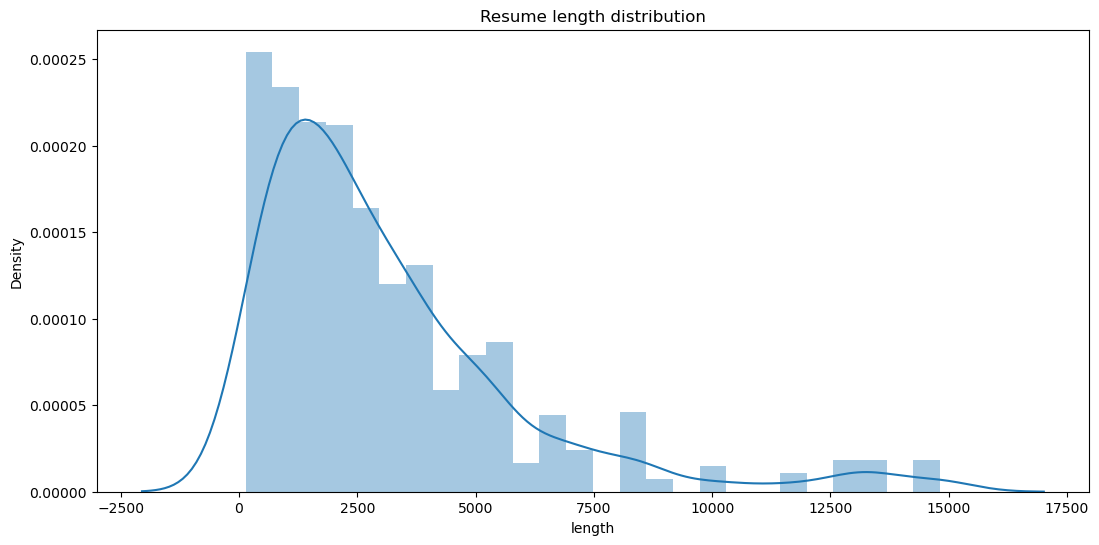

In [136]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution')

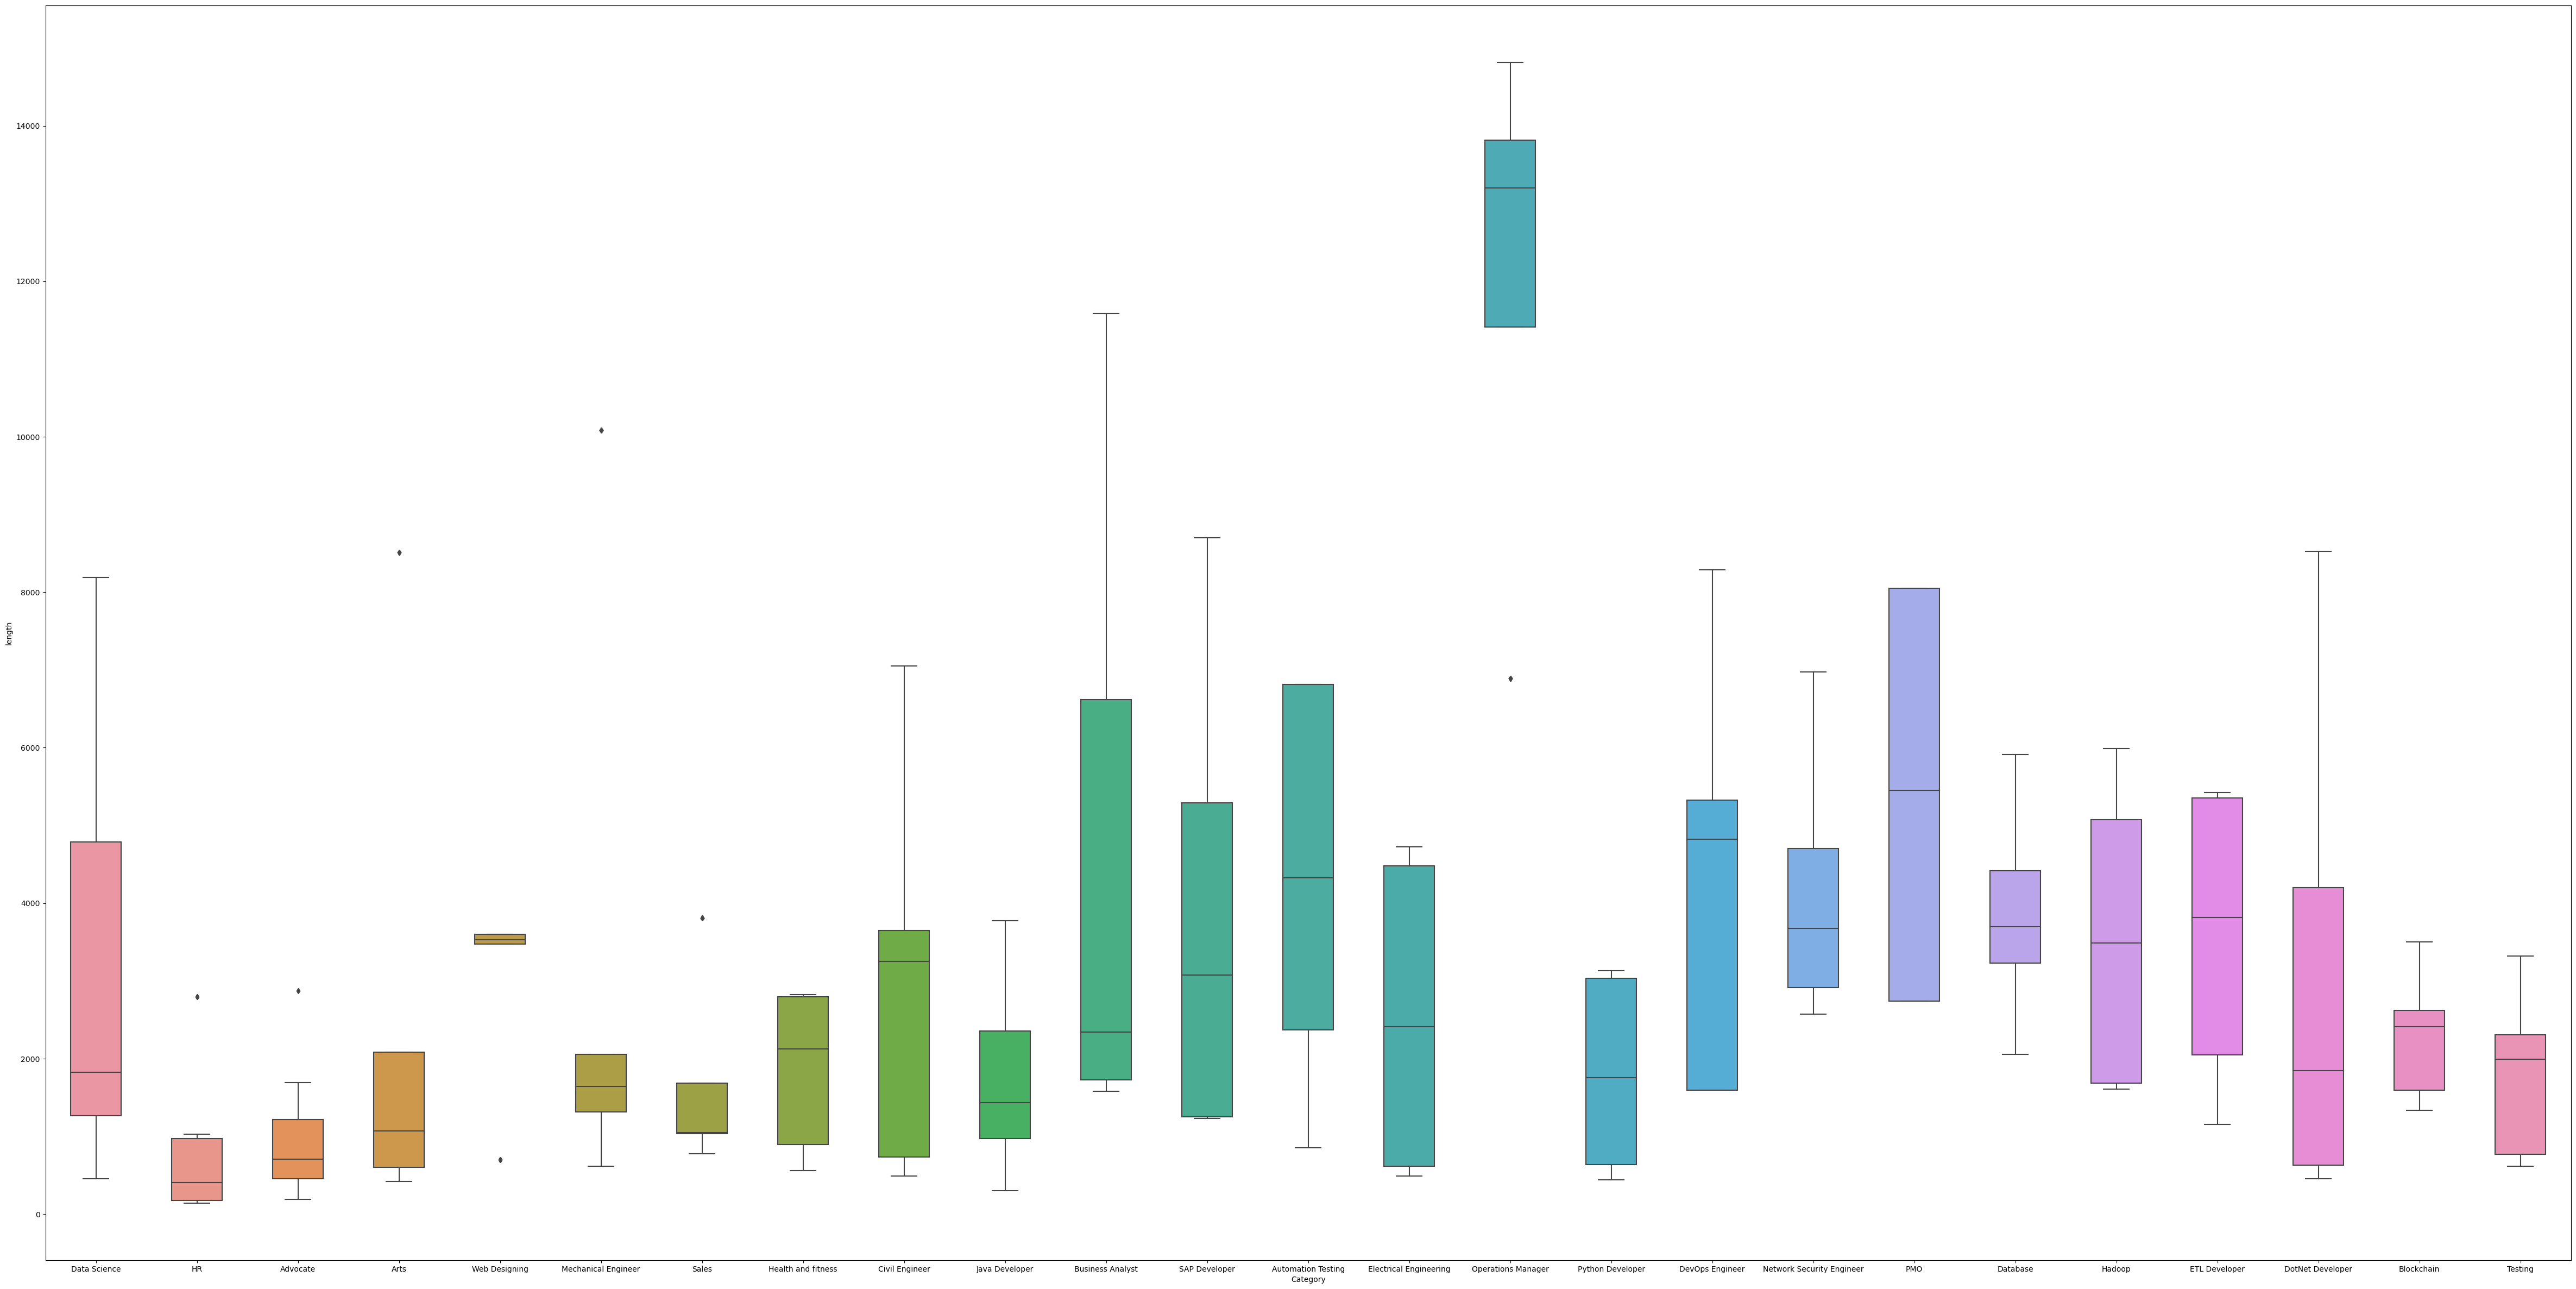

In [137]:
plt.figure(figsize=(60,30))
sns.boxplot(data=df, x='Category', y='length', width=.5);

In [138]:
value_counts = df['Category'].value_counts()
fig = px.pie(names=value_counts.index, values=value_counts.values)
fig.update_layout(
 title='Pie Chart of Category',
 title_x=0.5
)
fig.show()


In [139]:
df['Category'].value_counts()[:5].index

Index(['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
       'Web Designing'],
      dtype='object')

Visualizing most commonly used words in top 3 count Resumes

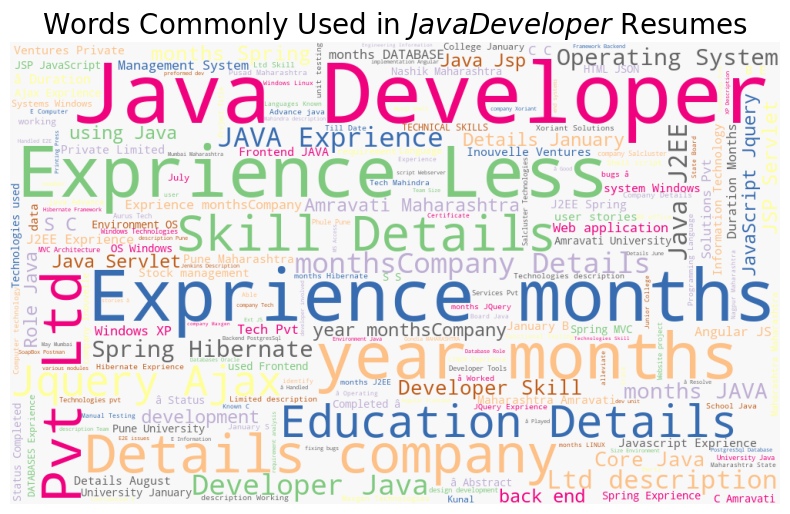

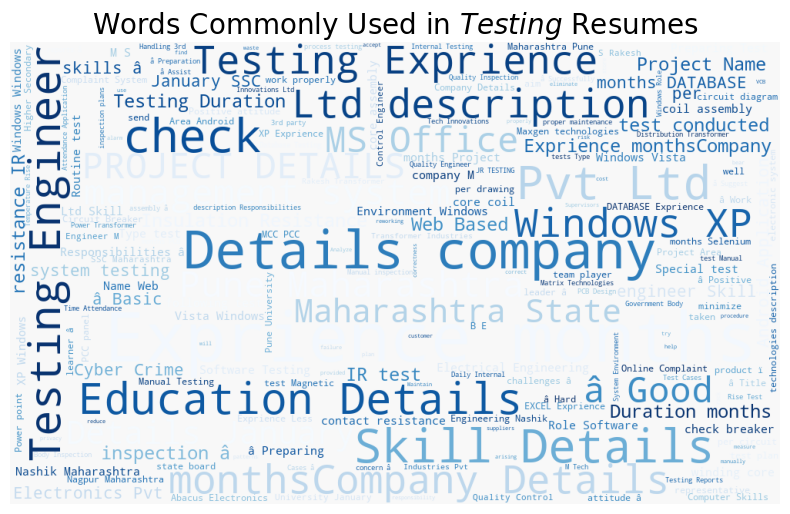

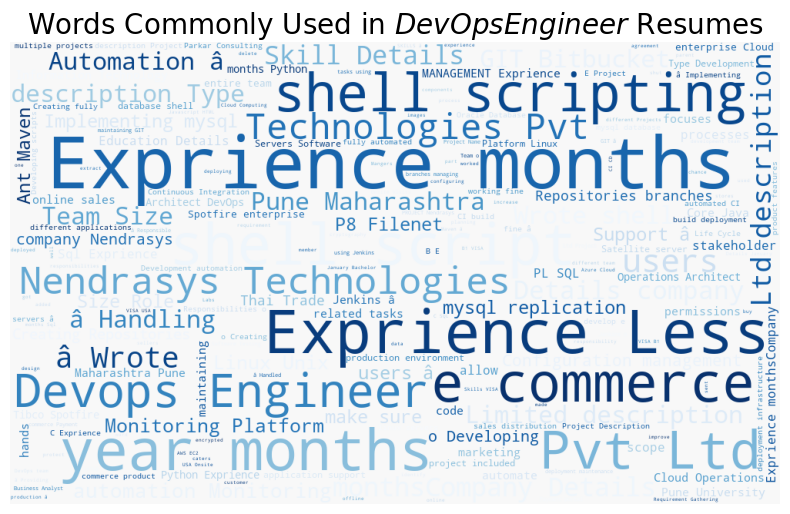

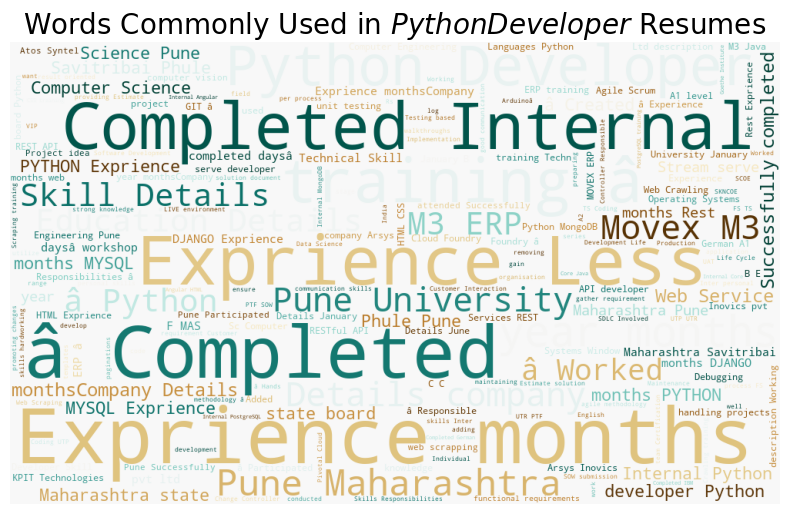

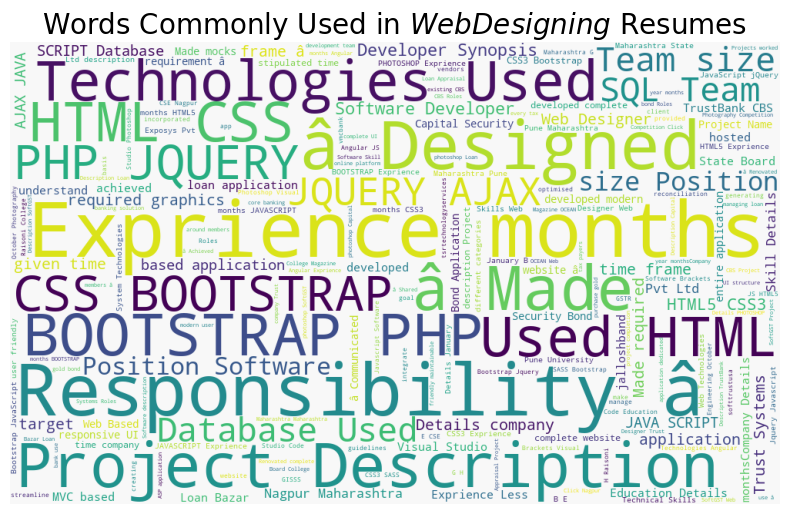

In [140]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:5].index
for label, cmap in zip(top_jobs, a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

 Visualizing most commonly used words in top 3 lowest count Resumes

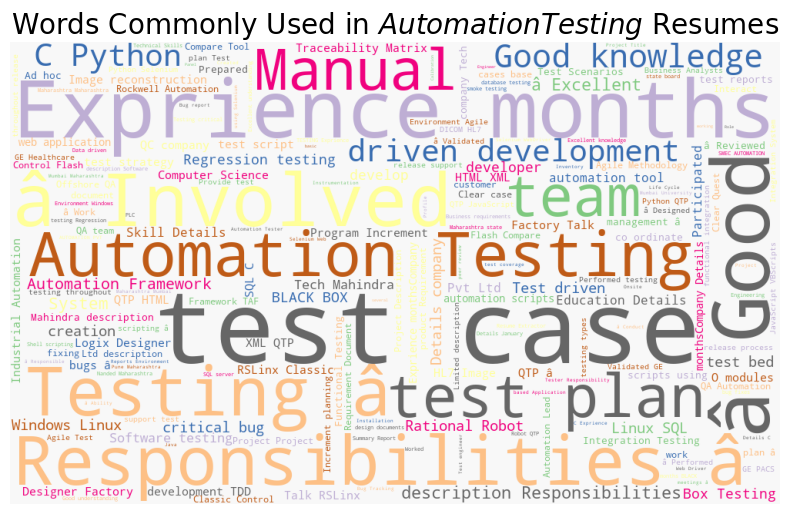

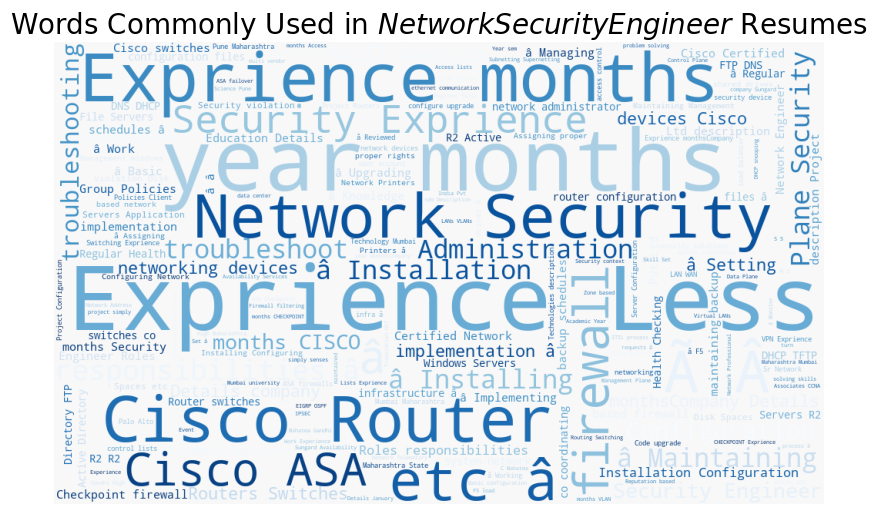

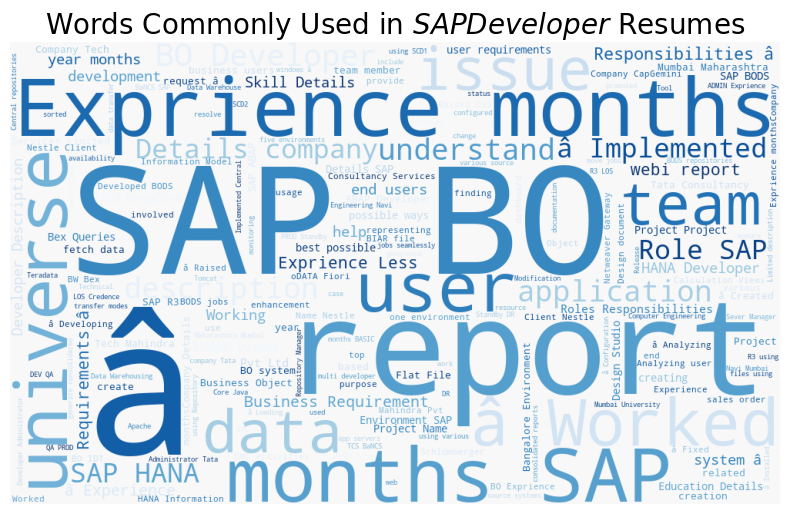

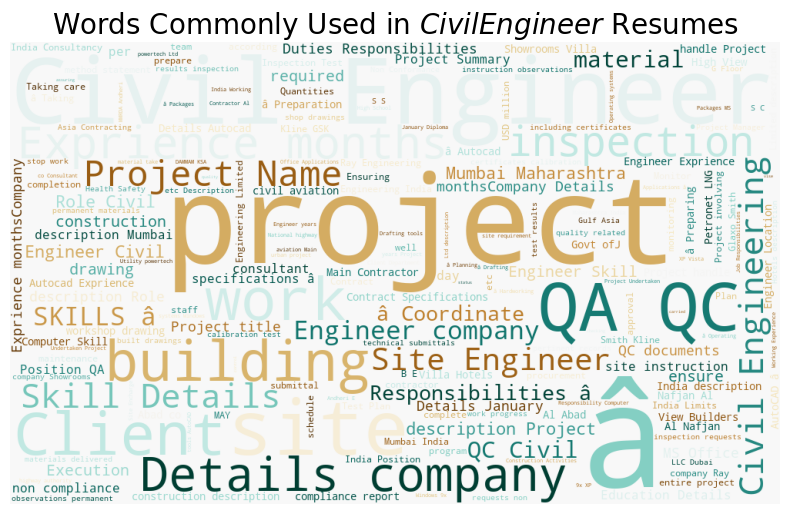

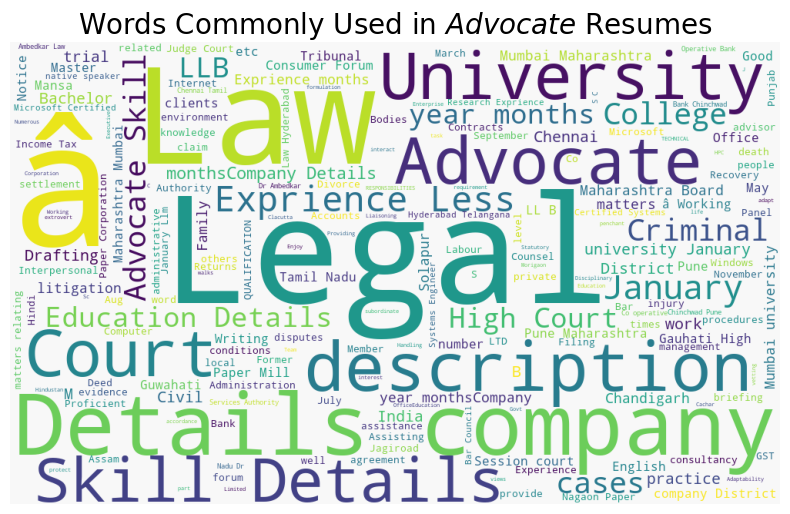

In [141]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-5:].index
for label, cmap in zip(top_jobs, a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

 Processing data

In [142]:
resumeDataSet = df.copy()
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

Category                                             Resume  length  \
0  Data Science  Skills * Programming Languages: Python (pandas...    4786   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...    1268   
2  Data Science  Areas of Interest Deep Learning, Control Syste...    1871   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...     452   

  cleaned_resume  
0                 
1                 
2                 
3                 
4

In [143]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

Visualizing after cleaning Resumes

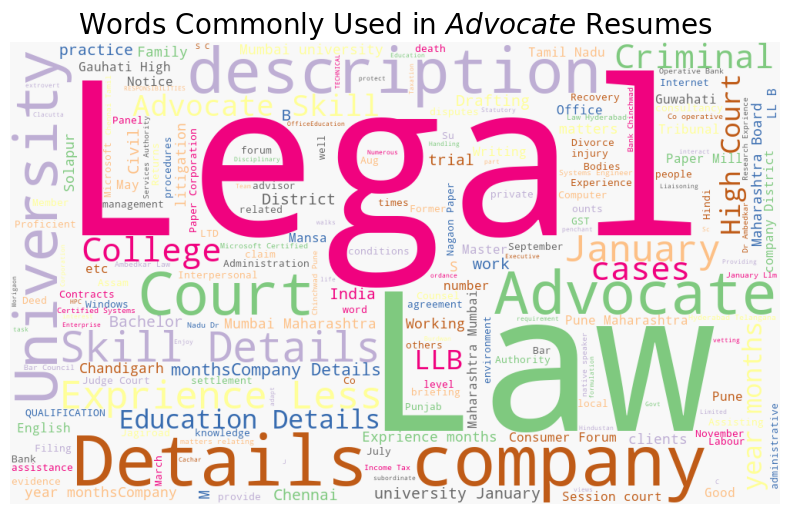

In [144]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = resumeDataSet['Category'].value_counts()[-1:].index
for label, cmap in zip(top_jobs, a):
    text = resumeDataSet.query("Category == @label")["cleaned_resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

Encoding labels into different values 

In [145]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [146]:
resumeDataSet.head()

Category                                             Resume  length  \
0         6  Skills * Programming Languages: Python (pandas...    4786   
1         6  Education Details \r\nMay 2013 to May 2017 B.E...    1268   
2         6  Areas of Interest Deep Learning, Control Syste...    1871   
3         6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995   
4         6  Education Details \r\n MCA   YMCAUST,  Faridab...     452   

                                      cleaned_resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [148]:
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.95
Accuracy of KNeighbors Classifier on test set: 0.94


In [149]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]


In [150]:
job_description = """

Position Overview

We are seeking a talented and driven Data Scientist to join our Global Advanced Analytics team. As a Data Scientist, you will be a crucial part of our mission to harness data-driven insights for business optimization and growth. You will work collaboratively with cross-functional teams, utilizing your expertise in statistical modeling, machine learning, and data analysis to provide valuable solutions to complex business challenges.

Key Responsibilities

•Collaborate with business managers to formulate problems, translating them into mathematical frameworks aligned with business goals.
•Develop a comprehensive understanding of business data and its context, ensuring its appropriate application in data analysis.
•Conduct exploratory data analysis to uncover patterns, trends, and potential insights to guide decision-making.
•Design, implement, and refine statistical, machine learning, and optimization models to solve business problems.
•Apply advanced statistical and machine learning techniques to classify structured and unstructured data effectively.
•Partner with internal stakeholders to identify business needs and design analytical solutions that enhance operational processes.
•Evaluate the performance and efficacy of machine learning and deep learning models, iterating as needed.
•Utilize industry-leading tools and open-source software for data analysis, including text mining and data mining methodologies.
•Stay up-to-date with emerging trends and technologies in data science, incorporating them into our analytical practices.

Requirements

•Bachelor's or Master's degree in Applied Statistics, Mathematics, Economics, Engineering, Operations Research, or a related field from a reputable institution.
•Proficiency in advanced statistical modeling and machine learning techniques.
•Strong skills in analytical/predictive modeling software such as Python, R, SAS, or similar tools.
•Solid understanding of predictive and analytical modeling theories, principles, and practices.
•Collaborative mindset with the ability to work effectively within a team of data scientists.
•Experience with data preparation, rationalization, and processing, particularly in big data environments.
•Proficiency in Natural Language Processing (NLP) and Natural Language Understanding (NLU).
•Familiarity with big data technologies like Spark, Hadoop, and Hive SQL, including hands-on experience with Hadoop and Hive tables.
•Ability to handle both structured and unstructured data effectively.
•Exceptional presentation skills for senior leadership audiences, adept at conveying insights through storytelling.
•Self-motivated with a strong drive for results, even in a dynamic and evolving work environment.
•A growth-oriented mindset with a willingness to learn and adapt to new skills and methodologies.

Benefits

•Competitive salary and performance-based incentives.
•Comprehensive health and wellness benefits package.
•Opportunities for skill development and continuous learning.
•Collaborative and innovative work environment.
•Chance to work on cutting-edge data science projects and impact business outcomes."""

In [151]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Data Science'

 Cosine Similiarity

In [152]:
text_tokenizer= WhitespaceTokenizer()
remove_characters= str.maketrans("", "", "±§!@#$%^&*()-_=+[]}{;'\:,./<>?|")
cv = CountVectorizer()

resume_docx = docx2txt.process('3YOLsSlfKq0n5WCsx3pebv50WleZ0wF6hZh15o2.docx')

#takes the texts in a list
text_docx= [resume_docx, job_description]
#creating the list of words from the word document
words_docx_list = text_tokenizer.tokenize(resume_docx)
#removing speacial charcters from the tokenized words 
words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
#giving vectors to the words
count_docx = cv.fit_transform(text_docx)
#using the alogorithm, finding the match between the resume/cv and job description
similarity_score_docx = cosine_similarity(count_docx)
match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
f'Match percentage with the Job description: {match_percentage_docx}'

'Match percentage with the Job description: 90.06'

In [153]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = match_percentage_docx,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Match with JD"}))

fig.show()

In [154]:
job_predictor = JobPredictor()
resume_position = job_predictor.predict(resume_docx)

chart_data = pd.DataFrame({
    "position": [cl for cl in job_predictor.le.classes_],
    "match": job_predictor.predict_proba(resume_docx)
})

fig = px.bar(chart_data, x="position", y="match",
                title=f'Resume matched to: {resume_position}')
fig.show()

In [155]:
uploaded_files = ['3YOLsSlfKq0n5WCsx3pebv50WleZ0wF6hZh15o2.docx', 'GB9Q7FYAyTHy8oejXvOvVTQpR0PKeVJsiZWh4FzI.docx', 'fix_MA22M019.docx','sLtKgc0iGu4BqQqvO32bXtSFeCQ5rklp0FYHuDAX.docx', 'data_science.docx']
job_predictor = JobPredictor()
job_positions = {x: 0 for x in [cl for cl in job_predictor.le.classes_]}
match_percentage = {}
for uploaded_file in uploaded_files:
    resume_docx = docx2txt.process(uploaded_file)
    resume_position = job_predictor.predict(resume_docx)
    job_positions[resume_position] += 1

#     job_description= docx2txt.process("temp_jd.docx")
    text_docx= [resume_docx, job_description]
    words_docx_list = text_tokenizer.tokenize(resume_docx)
    words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
    count_docx = cv.fit_transform(text_docx)
    similarity_score_docx = cosine_similarity(count_docx)
    match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
    match_percentage[uploaded_file.split('/')[-1]] = match_percentage_docx


In [156]:
match_chart_data = pd.DataFrame({
    "document": match_percentage.keys(),
    "percentage": match_percentage.values()
})

fig = px.bar(match_chart_data, x="document", y="percentage", title='Document Matched Percentage')
fig.show()

In [157]:
resume_position = job_predictor.predict(job_description)
total_matched = job_positions[resume_position]
total_files = len(uploaded_files)

print(f'Position of the Job description: {resume_position}')

fig = go.Figure(go.Indicator(
    mode = "delta+number",
    # gauge = {'axis': {'visible': False}},
    delta = {'reference': len(uploaded_files)},
    value = total_matched,
    domain = {'row': 0, 'column': 0},
    title = {'text': f"{total_matched} out of {len(uploaded_files)} Resume falls on same category of JD."}))

fig.show()

Position of the Job description: Data Science


In [158]:
df = pd.DataFrame({
    'names': ['Matched', 'Unmatched'], 
    'values': [total_matched, total_files]
})
fig = px.pie(df, values='values', names='names')
fig.show()

chart_data = pd.DataFrame({
    "position": job_positions.keys(),
    "match": job_positions.values()
})

fig = px.bar(chart_data, x="position", y="match", title=f'Resume Job Position distribution')
fig.show()